In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import string


In [ ]:
import os
import random
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import BertTokenizer, BertModel, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from typing import Union, List
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# !pip install nltk -U

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
tweet_data = pd.read_csv('labeled_data.csv')

In [ ]:
tweet_data['label'] = np.where((tweet_data['class'] == 0) | (tweet_data['class'] == 1), 0, 1)

In [ ]:
tweet_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,1
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0


In [ ]:
tweet_data['label'].value_counts()

label
0    20620
1     4163
Name: count, dtype: int64

In [ ]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters, numbers, and punctuations (except for hashtags and @mentions)
    text = re.sub("[^a-zA-Z#@]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    exclude =string.punctuation
    words = [word for word in words if word not in exclude]

    # Lemmatize words based on POS tags
    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(words)
    lemmatized_words = []
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        elif tag.startswith('JJ'):  # Adjective
            pos = 'a'
        else:
            pos = 'n'  # Default to noun
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))
    text = ' '.join(lemmatized_words)
    return text



In [ ]:
# !pip install --upgrade nltk


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
tweet_data['tweet']= tweet_data['tweet'].apply(preprocess_text)

In [ ]:
tweet_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,rt mayasolovely woman complain clean house amp...,1
1,1,3,0,3,0,1,rt mleew boy dat cold tyga dwn bad cuffin dat ...,0
2,2,3,0,3,0,1,rt urkindofbrand dawg rt sbaby life ever fuck ...,0
3,3,3,0,2,1,1,rt c g anderson viva base look like tranny,0
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...,0
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,muthaf lie lifeasking pearl corey emanuel righ...,0
24779,25292,3,0,1,2,2,go break wrong heart baby drive redneck crazy,1
24780,25294,3,0,3,0,1,young buck wan na eat dat nigguh like aint fuc...,0
24781,25295,6,0,6,0,1,youu get wild bitch tellin lie,0


In [ ]:
# import emoji

In [ ]:
# !pip install demoji

In [ ]:
from transformers import BertTokenizer, BertModel
import torch


In [ ]:
tweet_data['text_len'] = [len(text.split()) for text in tweet_data.tweet]

In [ ]:
tweet_data.sort_values(by=['text_len'], ascending=False)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label,text_len
16602,16985,3,0,0,3,2,rt nandagorgeous rt like bmth adtr ptv ymas sw...,1,31
8030,8255,3,0,2,1,1,bij vraag wat naam van de engels de doods dach...,0,27
6749,6937,3,0,3,0,1,n tsteven whatever wall hackin pussy bich fuk ...,0,25
13522,13855,3,0,1,2,2,och hoe wonderbaarlijk dat jan het alweer meet...,1,25
15155,15513,3,0,1,2,2,rt faaz taakstraf herkenbaar hesje je eigen bu...,1,25
...,...,...,...,...,...,...,...,...,...
22536,23012,3,0,2,1,1,trash,0,1
22587,23063,3,3,0,0,0,fag,0,1
7537,7751,3,0,3,0,1,bitch,0,1
7538,7752,3,0,3,0,1,bitch,0,1


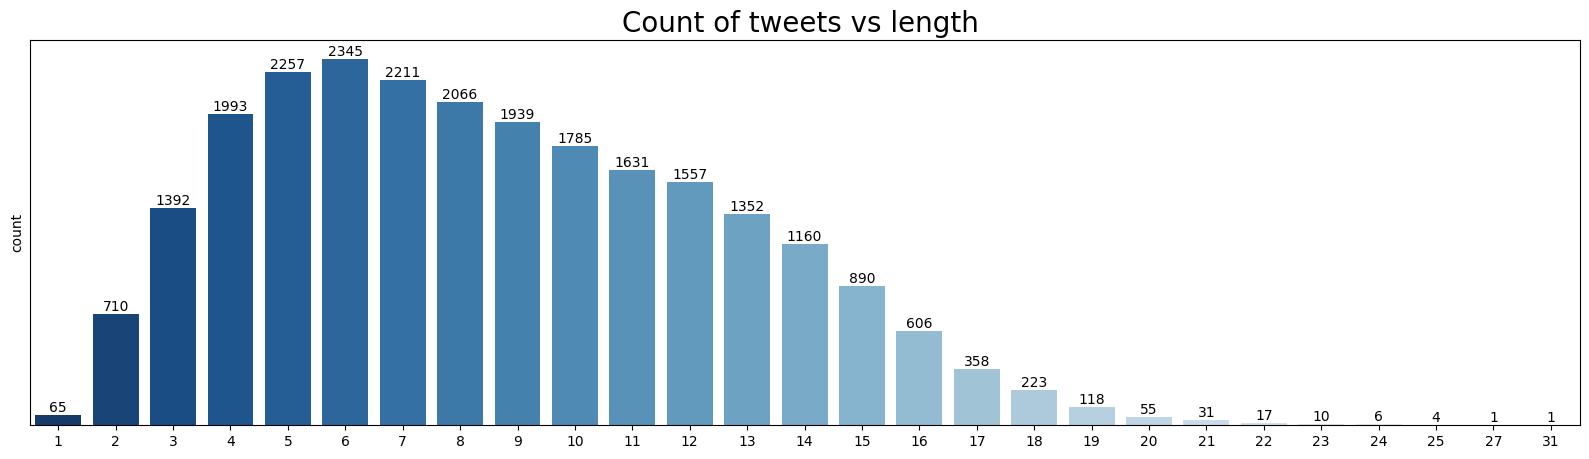

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='text_len', data=tweet_data[tweet_data['text_len']<=1000], palette='Blues_r')
plt.title('Count of tweets vs length ', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
tweet_data = tweet_data[tweet_data['text_len'] < tweet_data['text_len'].quantile(0.995)]

In [ ]:
max_len = np.max(tweet_data['text_len'])
max_len

19

In [ ]:
MAX_LEN =100

In [ ]:
from keras.preprocessing.sequence import pad_sequences

2024-04-24 10:15:18.817285: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 10:15:18.817414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 10:15:18.979227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
X = tweet_data['tweet'].values
y = tweet_data['label'].values

In [ ]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label)
        }

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

In [ ]:
from tqdm import tqdm

def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    with tqdm(total=len(data_loader), desc="Training") as progress_bar:
        for batch in data_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()
            total_loss += loss.item()
            progress_bar.update(1)
    return total_loss / len(data_loader)

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()
    predictions = list()
    actual = list()
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual.extend(labels.cpu().tolist())
    return accuracy_score(y_true=actual, y_pred=predictions), classification_report(y_true=actual, y_pred=predictions)

In [ ]:
def predict_class(text, model, tokenizer,classes, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)

    return classes[preds.item()]

In [ ]:
bert_model_name = 'bert-base-uncased'
num_classes = 2
max_length =60
batch_size = 32
num_epochs = 5
learning_rate = 2e-5

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2, random_state=42)
len(train_texts), len(val_texts), len(train_labels), len(val_labels)

(19726, 4932, 19726, 4932)

In [ ]:
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer=tokenizer, max_length=max_length)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer=tokenizer, max_length=max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier(bert_model_name, num_classes).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [ ]:
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    train(model, train_dataloader, optimizer, scheduler, device)
    accuracy, report = evaluate(model, val_dataloader, device)
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

Epoch 1/5


Training: 100%|██████████| 617/617 [02:04<00:00,  4.94it/s]


Validation Accuracy: 0.9670
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4119
           1       0.90      0.90      0.90       813

    accuracy                           0.97      4932
   macro avg       0.94      0.94      0.94      4932
weighted avg       0.97      0.97      0.97      4932

Epoch 2/5


Training: 100%|██████████| 617/617 [02:04<00:00,  4.97it/s]


Validation Accuracy: 0.9590
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4119
           1       0.92      0.82      0.87       813

    accuracy                           0.96      4932
   macro avg       0.94      0.90      0.92      4932
weighted avg       0.96      0.96      0.96      4932

Epoch 3/5


Training: 100%|██████████| 617/617 [02:04<00:00,  4.97it/s]


Validation Accuracy: 0.9625
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4119
           1       0.90      0.86      0.88       813

    accuracy                           0.96      4932
   macro avg       0.94      0.92      0.93      4932
weighted avg       0.96      0.96      0.96      4932

Epoch 4/5


Training: 100%|██████████| 617/617 [02:04<00:00,  4.97it/s]


Validation Accuracy: 0.9625
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4119
           1       0.90      0.87      0.88       813

    accuracy                           0.96      4932
   macro avg       0.94      0.92      0.93      4932
weighted avg       0.96      0.96      0.96      4932

Epoch 5/5


Training: 100%|██████████| 617/617 [02:04<00:00,  4.97it/s]


Validation Accuracy: 0.9629
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4119
           1       0.91      0.86      0.88       813

    accuracy                           0.96      4932
   macro avg       0.94      0.92      0.93      4932
weighted avg       0.96      0.96      0.96      4932



In [ ]:
def evaluate2(model, data_loader, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return total_loss / len(data_loader), accuracy


In [ ]:
def train(model, train_loader, val_loader, optimizer, scheduler, device, num_epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct_train = 0
        total_train = 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = total_loss / len(train_loader)
        train_losses.append(train_loss)
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        val_loss, val_accuracy = evaluate2(model, val_loader, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs Epoch')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy vs Epoch')

    plt.tight_layout()
    plt.show()

Epoch 1/5: 100%|██████████| 617/617 [02:04<00:00,  4.94it/s]


Epoch 1/5, Train Loss: 0.0182, Val Loss: 0.1475, Train Acc: 0.9945, Val Acc: 0.9629


Epoch 2/5: 100%|██████████| 617/617 [02:04<00:00,  4.94it/s]


Epoch 2/5, Train Loss: 0.0191, Val Loss: 0.1475, Train Acc: 0.9947, Val Acc: 0.9629


Epoch 3/5: 100%|██████████| 617/617 [02:05<00:00,  4.93it/s]


Epoch 3/5, Train Loss: 0.0181, Val Loss: 0.1475, Train Acc: 0.9948, Val Acc: 0.9629


Epoch 4/5: 100%|██████████| 617/617 [02:04<00:00,  4.94it/s]


Epoch 4/5, Train Loss: 0.0193, Val Loss: 0.1475, Train Acc: 0.9942, Val Acc: 0.9629


Epoch 5/5: 100%|██████████| 617/617 [02:04<00:00,  4.94it/s]


Epoch 5/5, Train Loss: 0.0175, Val Loss: 0.1475, Train Acc: 0.9948, Val Acc: 0.9629


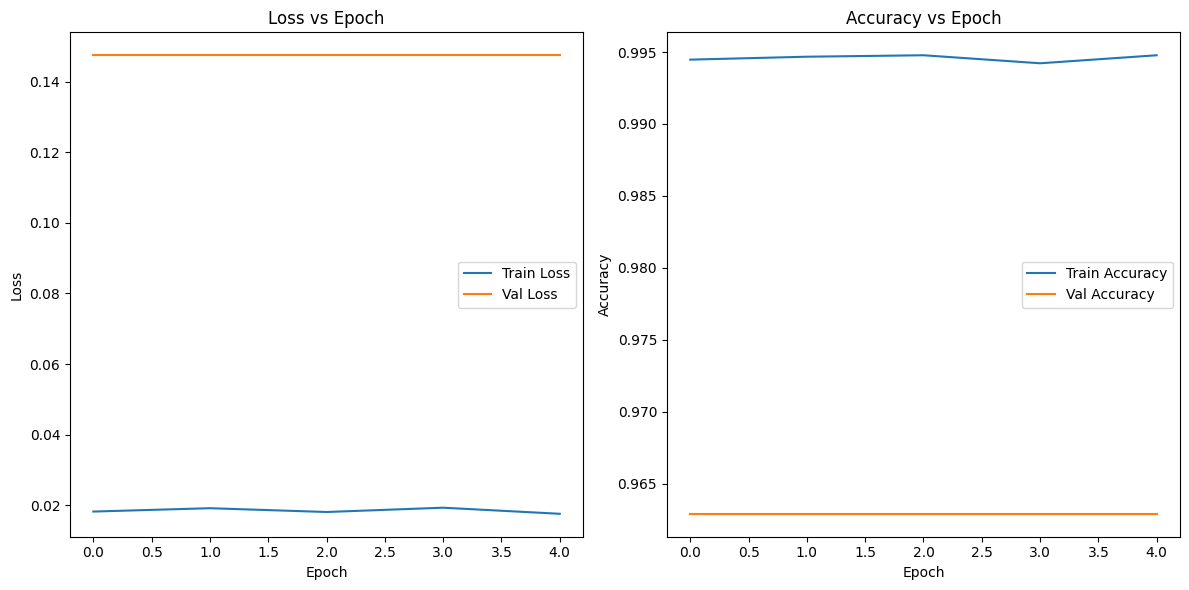

In [ ]:
train(model, train_dataloader, val_dataloader, optimizer, scheduler, device, 5)

In [ ]:
import seaborn as sns

Final Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4119
           1       0.91      0.86      0.88       813

    accuracy                           0.96      4932
   macro avg       0.94      0.92      0.93      4932
weighted avg       0.96      0.96      0.96      4932



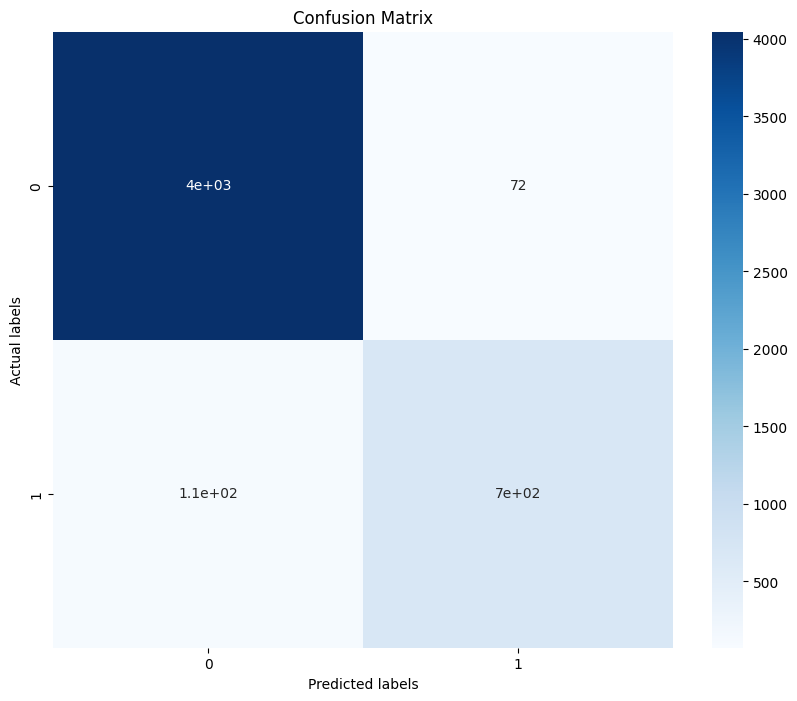

In [ ]:
def evaluate1(model, data_loader, device):
    model.eval()
    predictions = list()
    actual = list()
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual.extend(labels.cpu().tolist())

    accuracy = accuracy_score(y_true=actual, y_pred=predictions)
    classification_rep = classification_report(y_true=actual, y_pred=predictions)
    confusion_mat = confusion_matrix(y_true=actual, y_pred=predictions)

    # Create a pandas DataFrame for the confusion matrix
    cm_df = pd.DataFrame(confusion_mat, index=range(confusion_mat.shape[0]), columns=range(confusion_mat.shape[1]))

    return accuracy, classification_rep, cm_df

# Usage
accuracy, classification_rep, confusion_mat_df = evaluate1(model, val_dataloader, device)

# Print final classification report
print("Final Classification Report:\n", classification_rep)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_df, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

Train Data Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16405
           1       1.00      0.98      0.99      3321

    accuracy                           1.00     19726
   macro avg       1.00      0.99      0.99     19726
weighted avg       1.00      1.00      1.00     19726



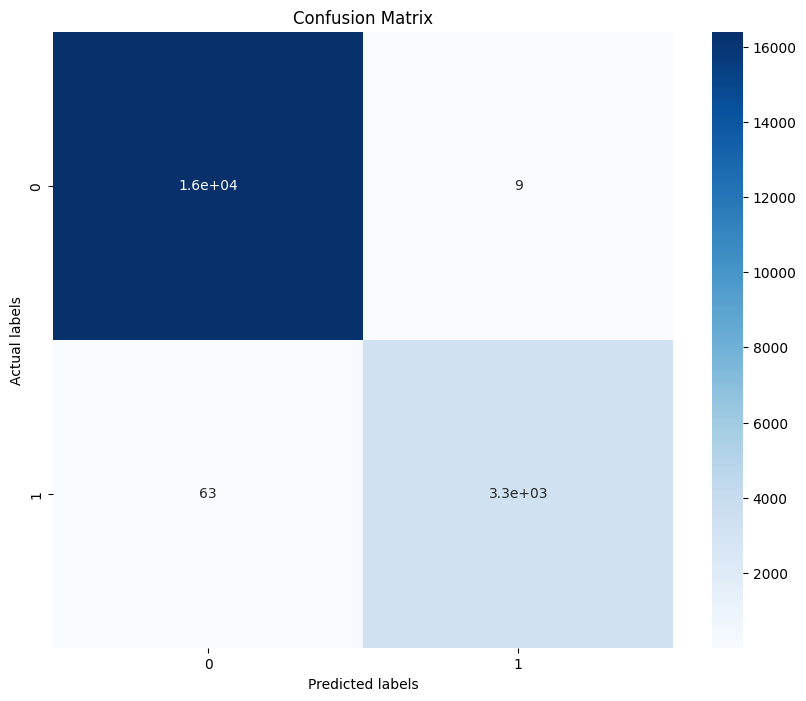

In [ ]:

# Usage
accuracy, classification_rep, confusion_mat_df = evaluate1(model, train_dataloader, device)

# Print final classification report
print("Train Data Classification Report:\n", classification_rep)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat_df, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'bert_model.pth')

# Load the model
loaded_model = BERTClassifier(bert_model_name='bert-base-uncased', num_classes=2)
loaded_model.load_state_dict(torch.load('bert_model.pth'))
loaded_model.eval()

BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [ ]:
tokenizer.save_pretrained("tokenizer_dir")

('/kaggle/working/tokenizer_dir/tokenizer_config.json',
 '/kaggle/working/tokenizer_dir/special_tokens_map.json',
 '/kaggle/working/tokenizer_dir/vocab.txt',
 '/kaggle/working/tokenizer_dir/added_tokens.json')

In [ ]:
load_tokenizer = BertTokenizer.from_pretrained("tokenizer_dir")

In [ ]:
def predict_single_text(text, tokenizer, model):
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)

    return preds.item()

# Example usage
text = "@MelissaRyan Look at what DC Public Schools are doing for bullying LGBT students now that @m_rhee is..."
prediction = predict_single_text(text, load_tokenizer, loaded_model)
print(prediction)

0


In [ ]:
accuracy_dict = {'Logistic Regression': 0.95 ,'SVM':0.95,'Naive_bayes':0.89,'RandomForest ':0.94,'Ensemble (RF + SVM + LR)':0.95,'CNN':0.941,'LSTM': 0.945 , 'BERT':0.96}

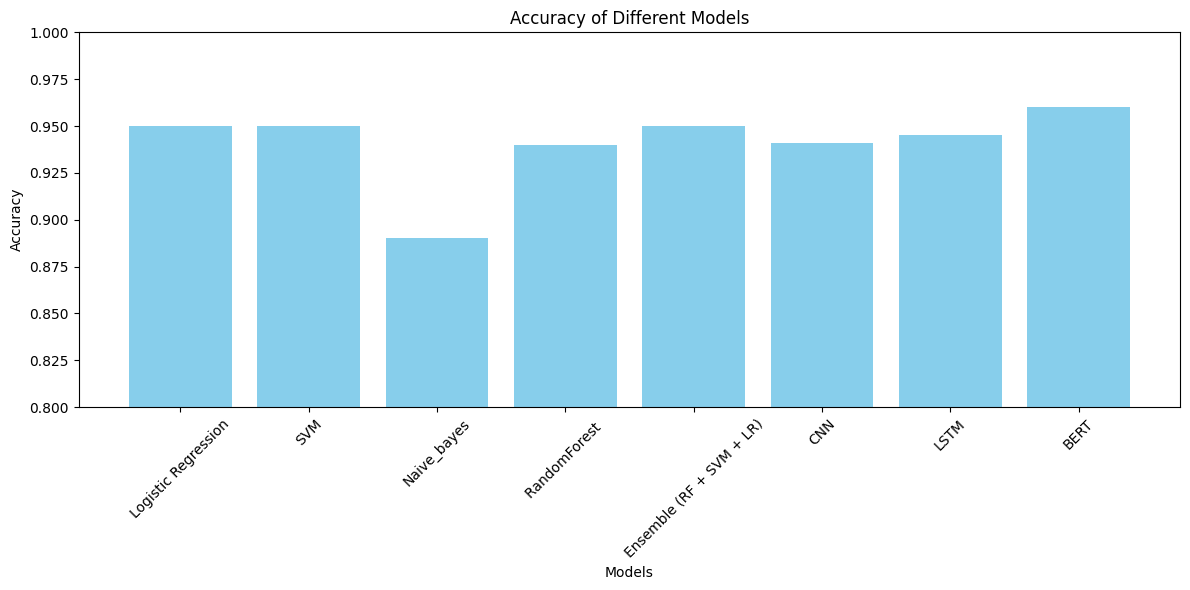

In [ ]:
models = list(accuracy_dict.keys())
accuracies = list(accuracy_dict.values())

# Plot
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.80, 1)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()